<DIV ALIGN=CENTER>

# Dimension Reduction
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we explore how to effectively use dimension
reduction to reduce the number of features in a given data set. This can
be important for a number of reasons including increasing the
performance of machine learning algorithms (since there is less data to
process) and potentially making the results more robust since dimensions
that contain less information can be excluded (thus an algorithm will be
forced to focus on the most important dimensions or features). This
topic is closely related to the subject of feature selection, which will
be discussed in more detail in a future lesson. In this notebook, we
will focus on identifying those dimensions (or features) that contain
the most _signal_ or information so that algorithms can focus on just
those dimensions.

While there are a number of algorithms that have been developed to
perform dimension reduction, the most popular technique is [principal
component analysis][pca] or PCA. PCA is an important tool for
exploratory data analysis, since PCA can quickly identify the most
relevant features. In mathematical terms, PCA is used to identify the
eigenvalues and [eigenvectors][ev] of a system of linear equations that
specify a transformation into a new dimensional space. These eigenvalues
contain the _expected variance_ or amount of the underlying signal, in
the data and thus provide insight into the new dimensions (specified by
the eigenvectors) that contain the most information. Thus, we can select
a subset of the new dimensions to reduce the dimensionality of our data
set. As we will see in this Notebook, [implementing PCA][skpca] in
Python is quite easy when using the scikit learn library.

-----
[ev]: https://en.wikipedia.org/wiki/Eigenvector
[skpca]: http://scikit-learn.org/stable/modules/decomposition.html
[pca]: https://en.wikipedia.org/wiki/Principal_component_analysis

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

-----

## Iris Data

To begin exploring PCA, we will use the classic [_Iris_ dataset][id],
which is included by default with the Seaborn library (note this same
data set is also included with scikit-learn). First, we will load the
data set into this Notebook, and construct a pair plot demonstrating the
relationships between the different dimensions (this code and resulting
figure are also included in the Seaborn documentation). The four primary
dimensions of the data include Sepal Length, Sepal Width, Petal Length,
and Petal Width, which can be seen from the following Iris picture (or
type _virginica_).

![Iris picture from Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg)

The data set consists of 150 total measurements of three different types
of Iris flowers, equally divided between three classes: Iris Setosa,
Iris versicolor, and Iris virginica. Before proceeding, lets visualize
the different dimensions to explore the importance of different
dimensions and the relationships between them.

-----
[id]: https://en.wikipedia.org/wiki/Iris_flower_data_set

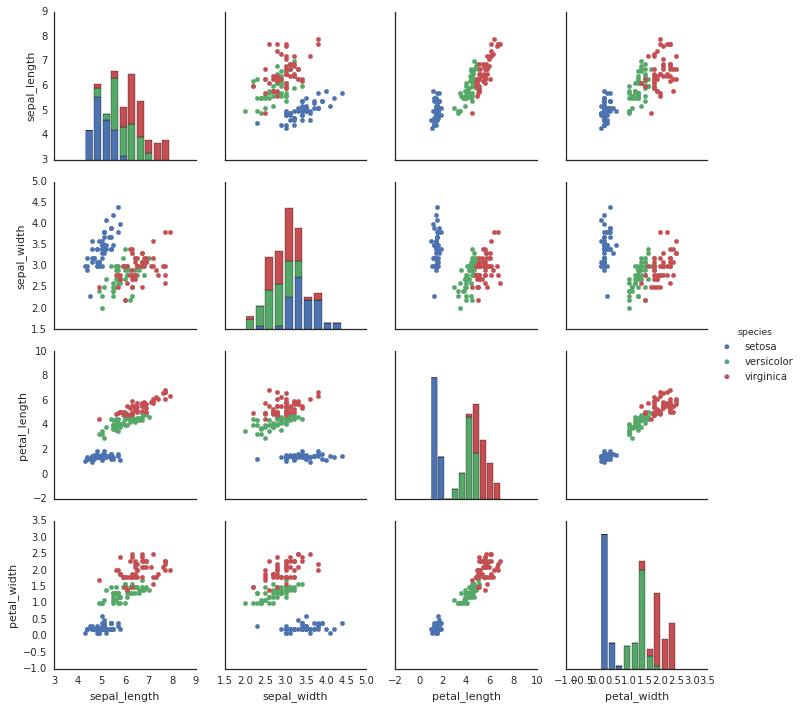

In [2]:
sns.set(style="white")

# Load the Iris Data
iris = sns.load_dataset("iris")

# Make pair plot
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

# Lets explicitly set the axes limits
axes = g.axes

lim = [(3, 9), (1.5, 5), (-2, 10), (-1, 3.5)]

for i in range(len(lim)):
    for j in range(len(lim)):
        axes[i, j].set_xlim(lim[j])
        axes[i, j].set_ylim(lim[i])

As the previous figure illustrates, the three types of Iris cluster
naturally in these dimensions, with minimal overlap. Thus we can expect
that we don't need all four dimensions (or features) to perform machine
learning on these data. To formalize this, we can perform dimensionality
reduction on these data to identify the most important features in the
data.

-----

## [Dimensionality Reduction][dr]

When confronted with a large, multi-dimensional data set, one approach
to simplify any subsequent analysis is to reduce the number of
dimensions that must be processed. In some cases, dimensions can be
removed from analysis based on business logic. More generally, however,
we can employ machine learning to seek out relationships between the
original dimensions (or  or columns of a DataFrame) to identify new
dimensions that better capture the inherent relationships within the
data.

The standard technique to perform this is known as principal component
analysis, or PCA. Mathematically, we can derive PCA by using linear
algebra to solve a set of linear equations. This process effectively
rotates the data into a new set of dimensions, and by ranking the
importance of the new dimensions, we can actually leverage fewer
dimensions in machine learning algorithms. PCA is demonstrated in the
following figure from Wikipedia, where we have a two-dimensional
Gaussian distribution. In the original space the data are widely spread.
By rotating into a coordinate system aligned with the Gaussian shape,
however, we have one primary dimension and a secondary dimension with
less spread.

![PCA Wikipedia Image][pcai]

We can easily implement PCA by using scikit-learn. The _PCA_ model
requires one tunable parameter that specifies the target number of
dimensions. This value can be arbitrarily selected, perhaps based on a
prior information, or it can be iteratively determined. After the model
is created, we fit the model to the data and next create our new,
rotated data set. This is demonstrated in the next code cell.

-----

[dr]: https://en.wikipedia.org/wiki/Dimensionality_reduction
[pca]: https://en.wikipedia.org/wiki/Principal_component_analysis
[pcai]: https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/GaussianScatterPCA.png/512px-GaussianScatterPCA.png

In [3]:
# Load the Iris Data
iris = sns.load_dataset("iris")
    
# Now lets get the data and labels
data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
labels = np.array([i//50 for i in range(iris.shape[0])])
  
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()

# Fit model to the data
pca.fit(data)

# We can print out rotation matrix and variance associated with each
# projected dimension

vars = pca.explained_variance_ratio_
c_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, c_names))
    print(output)

Variance:  Projected dimension
------------------------------
92.5%:     0.36 * SepalLength + -0.08 * SepalWidth +  0.86 * PetalLength +  0.36 * PetalWidth
 5.3%:    -0.66 * SepalLength + -0.73 * SepalWidth +  0.17 * PetalLength +  0.08 * PetalWidth
 1.7%:     0.58 * SepalLength + -0.60 * SepalWidth + -0.08 * PetalLength + -0.55 * PetalWidth
 0.5%:     0.32 * SepalLength + -0.32 * SepalWidth + -0.48 * PetalLength +  0.75 * PetalWidth


In [4]:
from sklearn.decomposition import FactorAnalysis

factor = FactorAnalysis().fit(data)

print(pd.DataFrame(factor.components_, columns=c_names))

   SepalLength  SepalWidth  PetalLength  PetalWidth
0     0.706989   -0.158005     1.654236     0.70085
1     0.115161    0.159635    -0.044321    -0.01403
2    -0.000000    0.000000     0.000000     0.00000
3    -0.000000    0.000000     0.000000    -0.00000


-----

### Reduction of dimensions

In this case, we see that the first two new dimensions capture over
97.5\% of the total variance in the data. Thus, by only keeping those
two new dimensions, we cut the number of features we must process in
half, and retain most of the underlying signal that we wish to model.
This is the fundamental point about dimension reduction. You *will* lose
some signal by removing dimensions, but often the loss is small to
insignificant, and the resulting impact on the resulting analysis can be
large in terms of overall performance, or for *big data* enabling the
computation to even become feasible.

To demonstrate the power of dimension reduction, we explore the impact
on classification of this dataset by using SVM on the full four
dimensional data set and on the projected data set.

----

In [5]:
# We analyze the full data by using SVC.

# We want to split our data into training and testing

from sklearn import cross_validation

# This is the amount to hold out for 'blind' testing
frac = 0.25

d_train, d_test, l_train, l_test \
    = cross_validation.train_test_split(data, labels, test_size=frac, random_state=0)

# Next lets try Linear SVM
from sklearn import svm

# Lets build our model and train it all at once
svc = svm.SVC(kernel='linear', C=1)
svc.fit(d_train, l_train)

# Now grab the predictions
result = svc.predict(d_test)

print("SVM prediction accuracy = {0:5.1f}%\n".format(100.0 * svc.score(d_test, l_test)))

from sklearn.metrics import classification_report

l_pred = svc.predict(d_test)
print(classification_report(l_test, l_pred, \
                            target_names = ['Setosa', 'Versicolor', 'Virginica']))

SVM prediction accuracy =  97.4%

             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        13
 Versicolor       1.00      0.94      0.97        16
  Virginica       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38



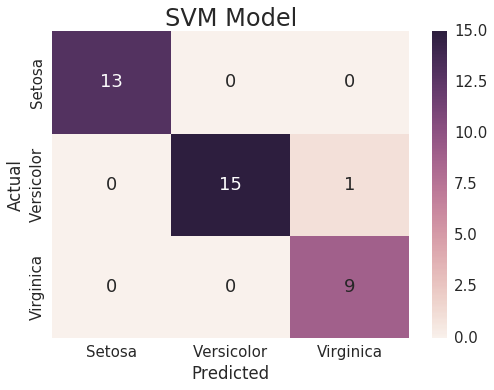

In [6]:
from helper_code import mlplots as mlp

mlp.confusion(l_test, l_pred, ['Setosa', 'Versicolor', 'Virginica'], 3, 'SVM Model')

In [7]:
# First we analyze the PCA compressed data by using SVC.

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)

# We want to split our data into training and testing

d_train, d_test, l_train, l_test \
    = cross_validation.train_test_split(data_reduced, labels, test_size=frac, random_state=0)

# Lets build our model
svc = svm.SVC(kernel='linear', C=1)
svc.fit(d_train, l_train)

# Now grab the predictions
result = svc.predict(d_test)

print("PCA/SVM prediction accuracy = {0:5.1f}%\n".format(100.0 * svc.score(d_test, l_test)))

from sklearn.metrics import classification_report

l_pred = svc.predict(d_test)
print(classification_report(l_test, l_pred, \
                            target_names = ['Setosa', 'Versicolor', 'Virginica']))

PCA/SVM prediction accuracy =  97.4%

             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        13
 Versicolor       1.00      0.94      0.97        16
  Virginica       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38



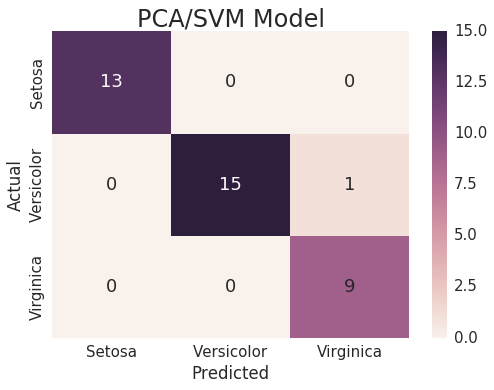

In [8]:
mlp.confusion(l_test, l_pred, ['Setosa', 'Versicolor', 'Virginica'], 3, 'PCA/SVM Model')

-----

As you can see, the PCA transformation cut the data volume in half, and
(at least with the fraction of training data set to 80\%) produced
nearly identical in the SVM classification (note since there is a random
selection of train/test data, your results might be different).

-----

-----

## Student Activity

In the preceding cells, we used PCA to transform the Iris data and
explored the impact of the reduced dimensionality on a simple
classification. Now that you have run this Notebook once, go back and
make the following changes to see how the results change.

1. Change the cross-validation split size, for example change from a
80%:20% to 75%:25% and to a 50%:50%?
2. Try using the three PCA dimensions for the classification, how do the results change?
3. Try using only the top PCA dimension for the classification, how do the results change?
4. Try using a different dimension reduction technique, such as Random
izedPCA, KernelPCA, or Non-Negative Matrix Factorization.

-----

## Handwritten Digits

Now we switch to a second type of data and explore PCA applied to the
handwritten digit data set. First we will load the data and review some
of the sample. After which, we will apply PCA to see how many features
are required to capture the majority of the variance. We also will look
at the resulting 'images', when reconstructed form a limited set of
components.

-----

Total number of samples = 1797


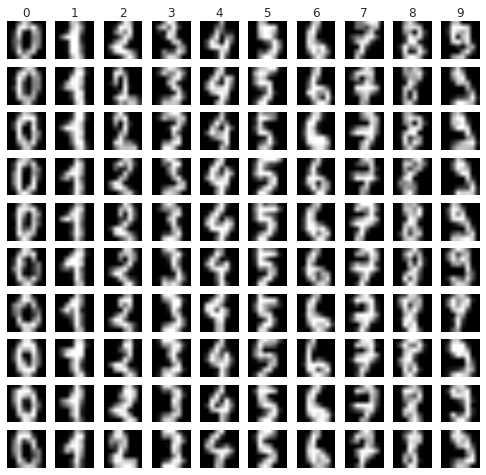

In [9]:
# We have helper code to assist in the loading and plotting of these data
from helper_code import digits as hd

# We extract features (x), labels (y), and the images for plotting.
x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(y.shape[0]))

# Compute PCA for these data
pca = PCA(copy=True).fit(x)

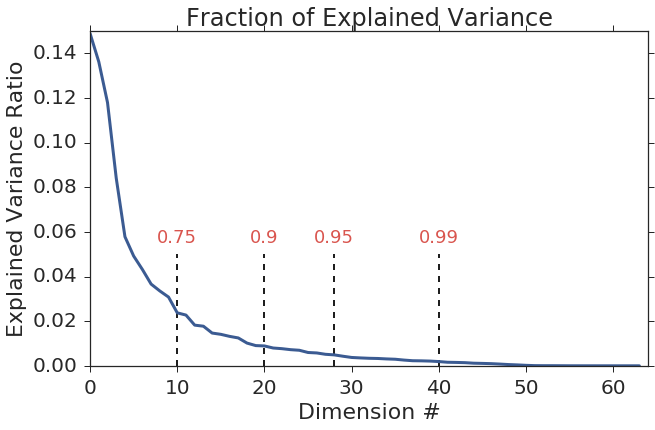

In [10]:
# We compute the cumulaive variance
lmts = [0.75, 0.9, 0.95, 0.99]
vars = np.cumsum(pca.explained_variance_ratio_)
vls = np.array([np.argmax(vars > i) for i in lmts])

# Make the plot
sns.set(style="ticks", font_scale=2.0)
fig, ax = plt.subplots(figsize=(10,6))

# Decorate the plot
ax.set_xlabel('Dimension #')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Fraction of Explained Variance')

ax.set_xlim(0, 64.0)
ax.set_ylim(0, 0.15)

# Draw lines for the cumulative variance
ax.vlines(vls, 0.0, 0.05, linestyles='dashed') #colors=sns.xkcd_rgb)
for xl, txt in zip(vls, lmts):
    ax.text(xl, 0.055, str(txt), fontsize = 18, \
            color=sns.xkcd_rgb["pale red"], \
            horizontalalignment='center')
    
# Now draw the points, with bolder colors.
plt.plot(pca.explained_variance_ratio_, color=sns.xkcd_rgb["denim blue"], linewidth=3)

plt.show()
sns.despine(offset=5, trim=True)

-----

### Visualization of Components

While the expected variance figure above shows the relative importance
of each feature, you can also see the same information by visually
inspecting the principal components themselves. In the following cell,
we first display ten original images, after which we compute the full
set of eigenvectors for the handwritten digit data set. We subsequently
display the first 60 components sorted in order of decreasing
importance. The visual changes are striking, demonstrating how the
latter components have less information.

-----

Total number of PCA Components = 64


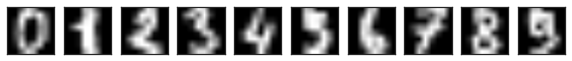

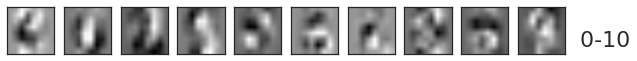

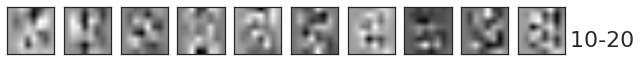

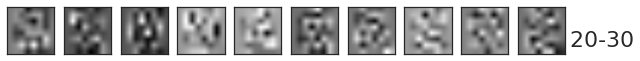

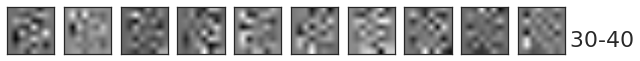

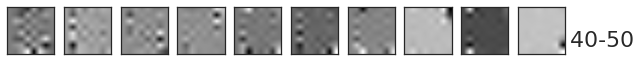

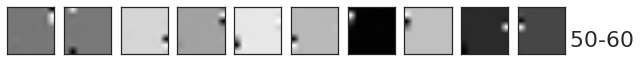

In [11]:
# Display ten representaive images
hd.plot_numbers(x[0:10])

# Now compute full set of components
pca = PCA()
pca.fit_transform(x)
print('Total number of PCA Components = {0}'.format(pca.n_components_))

# Display first 60 components in 6 rows of ten images each.
# Ordered by decreasing eigenvalues
for npc in range(0, 60, 10):
    hd.plot_numbers(pca.components_[npc:npc + 10])
    ax = plt.gca()
    ax.yaxis.set_label_position("right")
    ax.set_ylabel('     {0:6d}-{1:2d}'.format(npc, npc + 10), rotation=0)

-----

### Reconstruction

We can vary the number of components in PCA and see the quality of the
reconstructed data. In the following cell, we display a set of ten
images and in subsequent rows we display the reconstructed versions of
these ten images with progressively more components. When only using a
few components (the first few rows), the reconstruction is blurry and
lacks fidelity. Once we get to around ten components, however, the
reconstructions is fairly good. This indicates that the full set of 64
components is clearly not needed to represent this data (think about all
of the _black_ or zero valued pixels in the original images).

-----

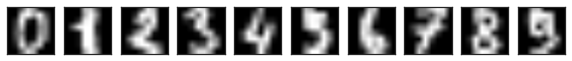

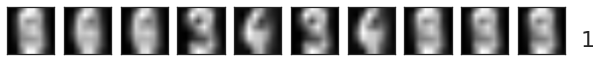

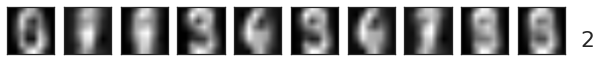

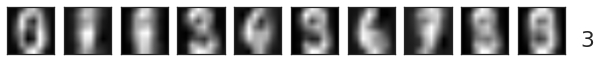

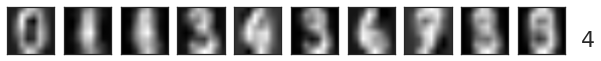

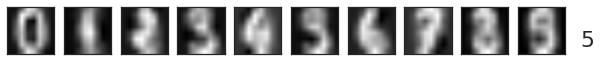

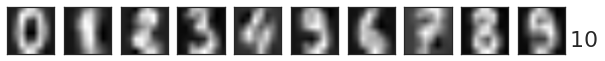

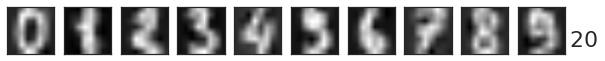

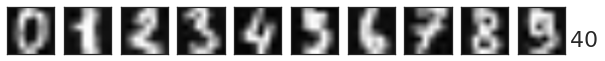

In [12]:
hd.plot_numbers(x[0:10])

ncps = [1, 2, 3, 4, 5, 10, 20, 40]
for npc in ncps:
    pca = PCA(n_components=npc, copy=True)
    tx = pca.fit_transform(x)
    hd.plot_numbers(pca.inverse_transform(tx)[0:10])
    ax = plt.gca()
    ax.yaxis.set_label_position("right")
    ax.set_ylabel('{0:6d}'.format(npc), rotation=0)


-----

### Covariance Matrix

We can display the computed covariance matrix that is computed during
the determination of the eigenvectors. This matrix is stored as a 64 x
64 element array, recall that the images are handled as 64 element
vectors (or arrays). The covariance matrix encodes the relationship
between each pixel in each eigenvector. Thus, it is symmetric about the
diagonal, and one can extract the mean image content from this matrix.

-----

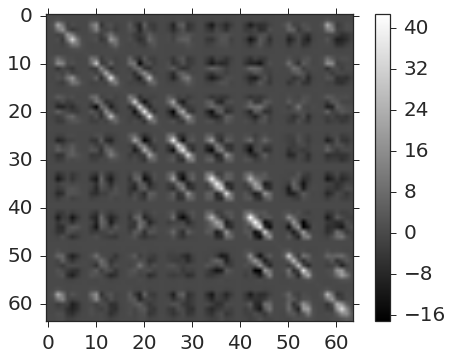

In [13]:
pca = PCA(n_components=npc, copy=True)
pca.fit(x)

plt.imshow(pca.get_covariance())
plt.colorbar()

-----

### Model Evaluation

We can now use the the computed PCA components to visually compute what
our fake handwritten digit data look like in the set of retained
components. To do this, we simply compute a PCA (with a fixed number of
components), transform our new data into the set of reduced dimensions
and then apply an inverse transform to display the reconstructed
versions of our original fake data. We first do this for the _ones_
before moving on to the _sevens_.

-----

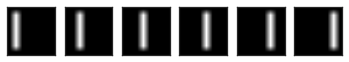

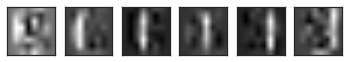

In [14]:
# Test on our sevens

ones = hd.make_ones()

hd.plot_numbers(ones)

# You can change the values to make other numbers.

pca = PCA(n_components=20, copy=True).fit(x)
t_ones = pca.transform(ones)

hd.plot_numbers(pca.inverse_transform(t_ones))

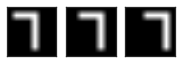

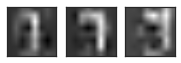

In [15]:
# Test on our sevens

sevens = hd.make_sevens()

hd.plot_numbers(sevens)

# You can change the values to make other numbers.

pca = PCA(n_components=20, copy=True).fit(x)
t_sevens = pca.transform(sevens)

hd.plot_numbers(pca.inverse_transform(t_sevens))

-----
## Technique Comparison

At the start of this Notebook, the PCA technique was introduced as one
of several methods for performing dimension reduction. One problem with
standard PCA is that a (potentially large) matrix must be inverted.
Matrix operations can be computationally intensive, even when using a
powerful technique like SVD (or singular value decomposition). As a
result, other techniques have been developed to more effectively deal
with more complex dimensional transformations and larger data volumes.
In the following cell, we display the transformation computed by several
other dimension reduction techniques supported by scikit learn:
randomized PCA, Non-negative Matrix Factorization, Factor Analysis, and
Independent Component Analysis. While a more complete description of
these techniques is beyond the scope of this lesson, we can compute
these dimension reduction techniques and compare their components
visually.

-----

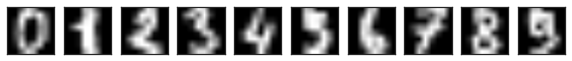

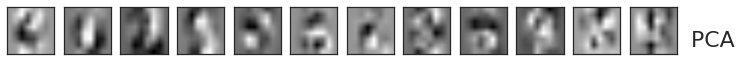

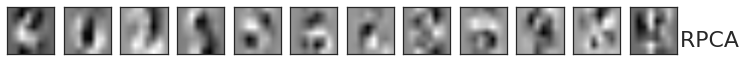

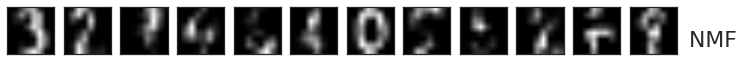

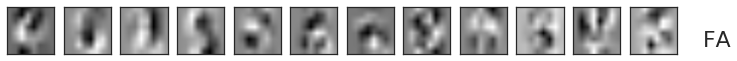

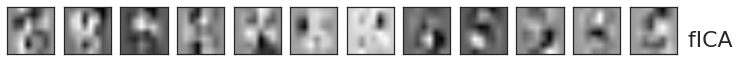

In [16]:
# Principal Component Analysis
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import NMF
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import FastICA


npc = 12
pca = PCA(n_components=npc, copy=True)
rpca = RandomizedPCA(n_components=npc)
nmf = NMF(n_components=npc, init='nndsvda', tol=5e-3)
fa = FactorAnalysis(n_components=npc, max_iter=2)
fica = FastICA(n_components=npc)

hd.plot_numbers(x[:10])

adr = [pca, rpca, nmf, fa, fica]
nam = ['PCA', 'RPCA', 'NMF', 'FA', 'fICA']
for dr, nm in zip(adr, nam):
    tx = dr.fit(x)
    hd.plot_numbers(dr.components_[: npc])
    ax = plt.gca()
    ax.yaxis.set_label_position("right")
    ax.set_ylabel('{0:>12s}'.format(nm), rotation=0)

-----

## Student Activity

In the preceding cells, we used PCA to reduce the dimensionality of the
digit data. Now that you have run the Notebook, go back and make the
following changes to see how the results change.

1. Change the number of components in the analysis of the fake
handwritten data. How does this change the reconstruction?

2. Try multiplying the covariance matrix by several original images.
What does the resulting _image_ look like?

3. Try changing the standard PCA we used in this notebook to incremental
PCA. What benefits does this new approach provide? How do the results
differ with standard PCA?



-----